<h2>OBSERVATIONAL ASTROPHYSICS – FALL 2019 Reduction Exercise: Part 3</h2>

In this part you will take all of your images in a given band and align them using a program called "astroalign"

We will be aligning images with the http://toros-astro.github.io/astroalign/ package

First, from within your python3 enviroment you will need to run "*conda install astroalign*" to install the package

In [12]:
import astroalign as aa
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy.io import fits

A function that takes an source image name, a target image name to which the source will be transformed, and an output file name.  The output file will be the source image transformed to match the target image.

In [13]:

def im_trans(filesource,filetarg,fileout):
    #filesource is the file that you want to be transformed
    #filetarg is the file that you want to transform the first file to
    #fileout is the output file that has been transformed

    redpath = redpath = "/home/m897k396/ASTR596/Data_Reduced_20191104/"
    imgfilesource = redpath + filesource
    imgfiletarg = redpath + filetarg
    print(imgfilesource)

    #read in the source file and target file, splitting the file into a data and header component
    imgsource, hdrsource = fits.getdata(imgfilesource, header=True)
    imgtarg, hdrtarg = fits.getdata(imgfiletarg, header=True)

    #run the alignment tool.
    imgsource_aligned, footprint = aa.register(imgsource, imgtarg)

    #write out the transformed file
    imtransname = redpath + fileout
    fits.writeto(imtransname, imgsource_aligned, header=hdrsource, overwrite=True)

    #find the transformation
    p, (pos_imgsource, pos_imgsource_aligned) = aa.find_transform(imgsource, imgtarg)
                            
    #print out the transformation
    #******check that the output makes sense for each target
    print("Rotation: {:.2f} degrees".format(p.rotation * 180.0 / np.pi))
    print("\nScale factor: {:.2f}".format(p.scale))
    print("\nTranslation: (x, y) = ({:.2f}, {:.2f})".format(*p.translation))
    
    #plot the stars found in common in each plot
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    colors = ['r', 'g', 'b', 'y', 'cyan', 'w', 'm']

    axes[0, 0].imshow(imgsource, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 0].axis('off')
    axes[0, 0].set_title("Source Image")
    for (xp, yp), c in zip(pos_imgsource[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4, fill=False, edgecolor=c, linewidth=5)
        axes[0, 0].add_patch(circ)

    axes[0, 1].imshow(imgtarg, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[0, 1].axis('off')
    axes[0, 1].set_title("Target Image")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[0, 1].add_patch(circ)

    axes[1, 1].imshow(imgsource_aligned, cmap='gray', interpolation='none', origin='lower',vmin = 250, vmax = 1000)
    axes[1, 1].axis('off')
    axes[1, 1].set_title("Source Image aligned with Target")
    for (xp, yp), c in zip(pos_imgsource_aligned[:len(colors)], colors):
        circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=5)
        axes[1, 1].add_patch(circ)

    axes[1, 0].axis('off')

    plt.tight_layout()
    plt.show()

Make a series of calls to this function that transform each of your images to the first image in that band for each target.  I give an example below.

/home/m897k396/ASTR596/Data_Reduced_20191104/s061_trbf.fits
Rotation: 0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (-32.55, -0.50)


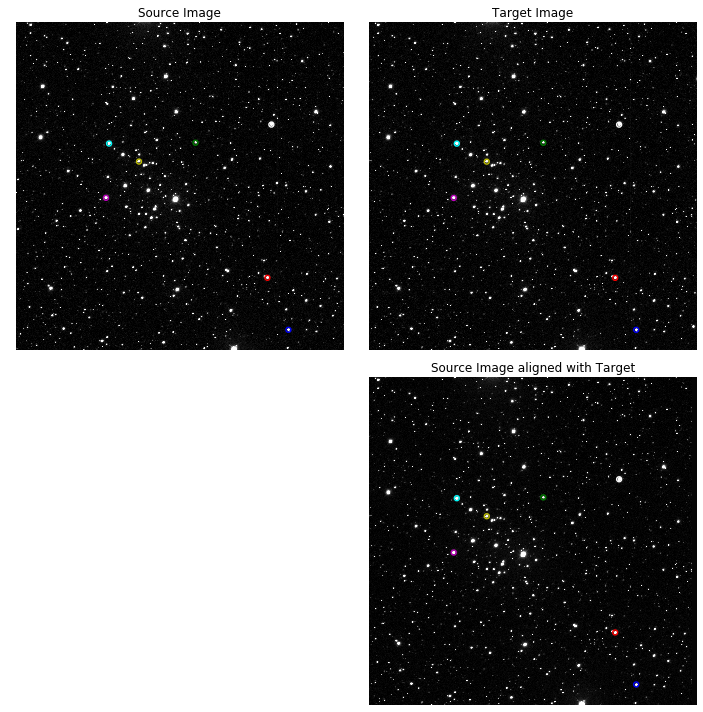

/home/m897k396/ASTR596/Data_Reduced_20191104/s062_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-66.58, -0.73)


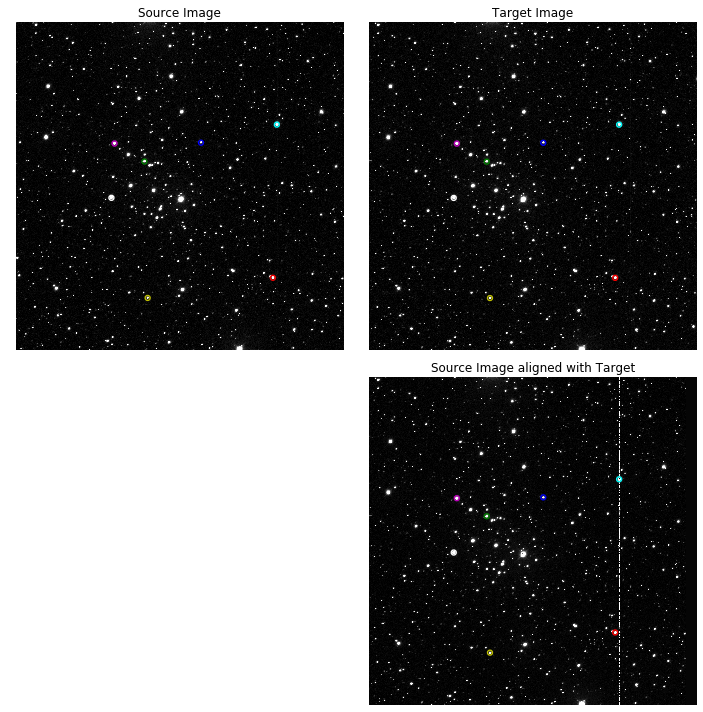

/home/m897k396/ASTR596/Data_Reduced_20191104/s063_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-103.79, -1.22)


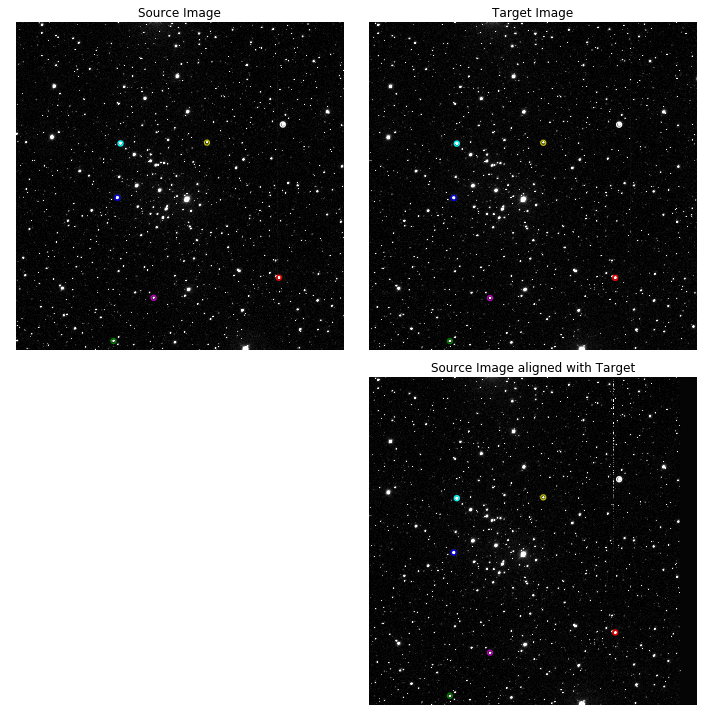

/home/m897k396/ASTR596/Data_Reduced_20191104/s064_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-138.82, -1.78)


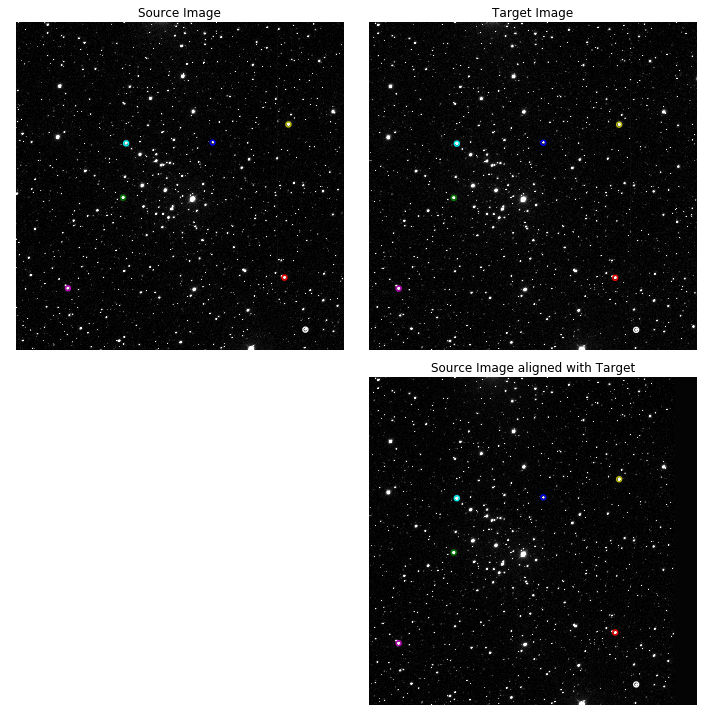

/home/m897k396/ASTR596/Data_Reduced_20191104/s065_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-170.96, -2.46)


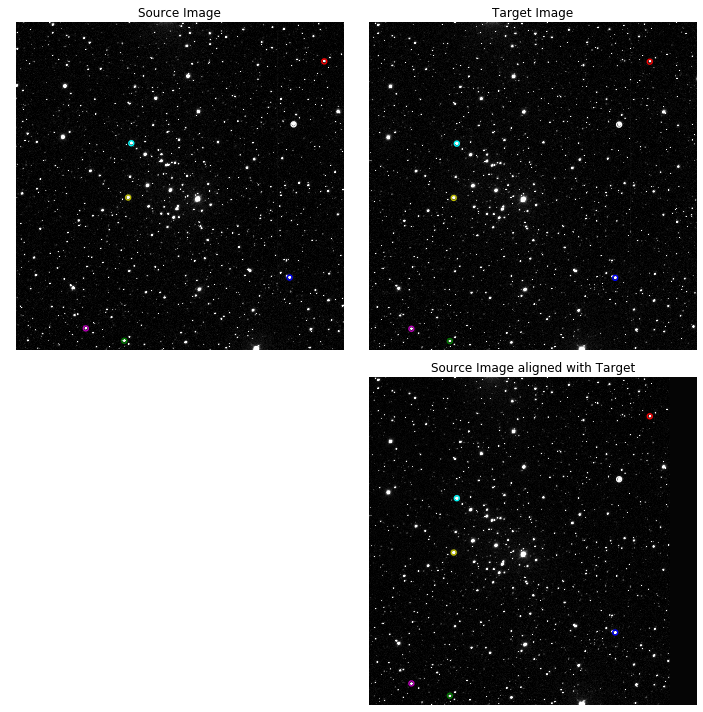

/home/m897k396/ASTR596/Data_Reduced_20191104/s066_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-206.46, -3.08)


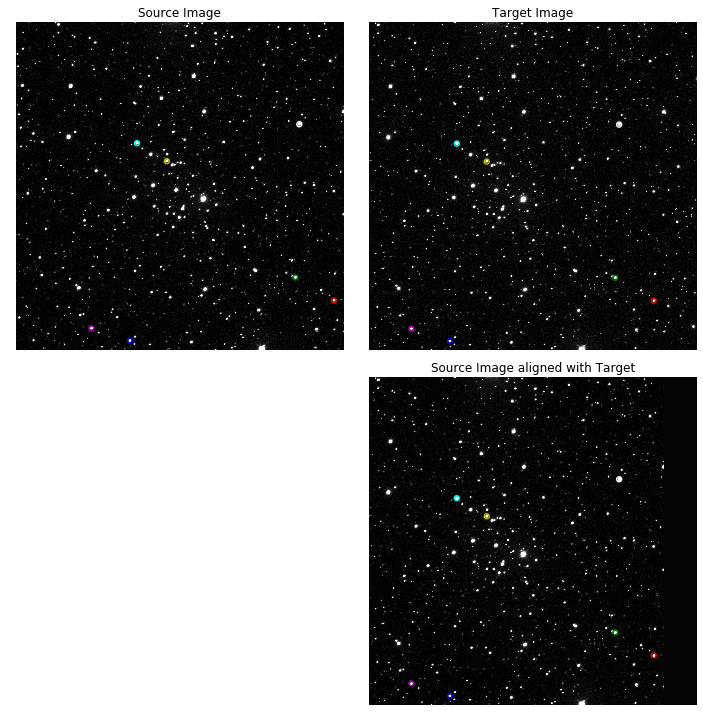

/home/m897k396/ASTR596/Data_Reduced_20191104/s067_trbf.fits
Rotation: 0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (-242.80, -3.62)


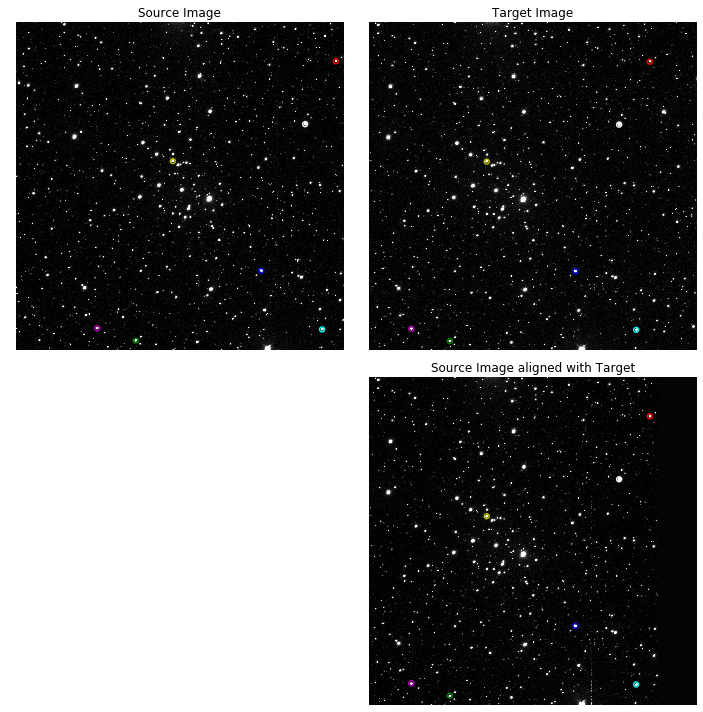

/home/m897k396/ASTR596/Data_Reduced_20191104/s068_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-217.52, -4.24)


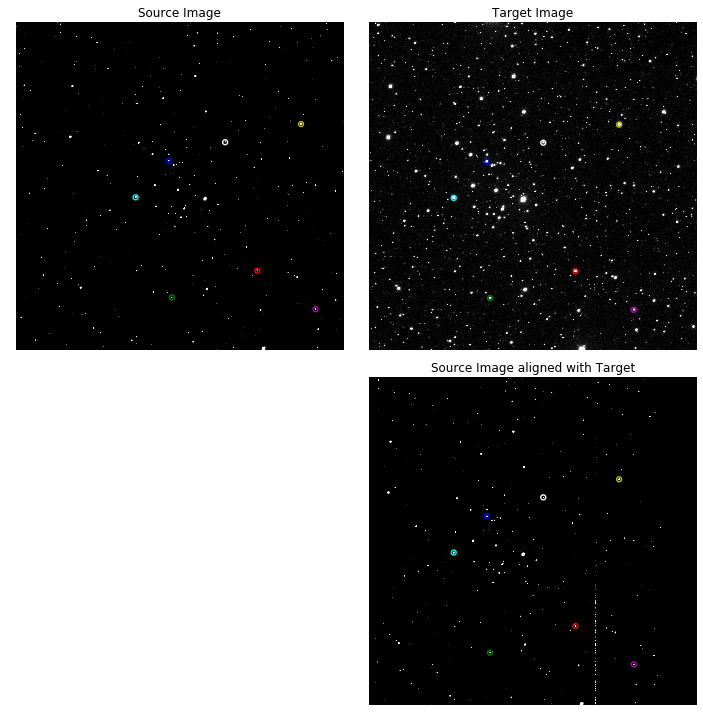

/home/m897k396/ASTR596/Data_Reduced_20191104/s069_trbf.fits
Rotation: 0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (-187.34, -5.06)


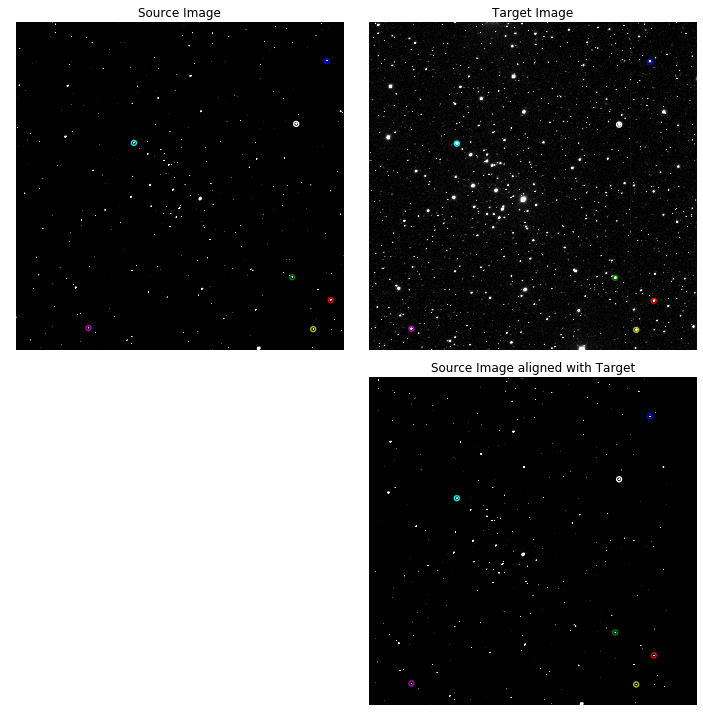

/home/m897k396/ASTR596/Data_Reduced_20191104/s070_trbf.fits
Rotation: 0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (-154.26, -4.95)


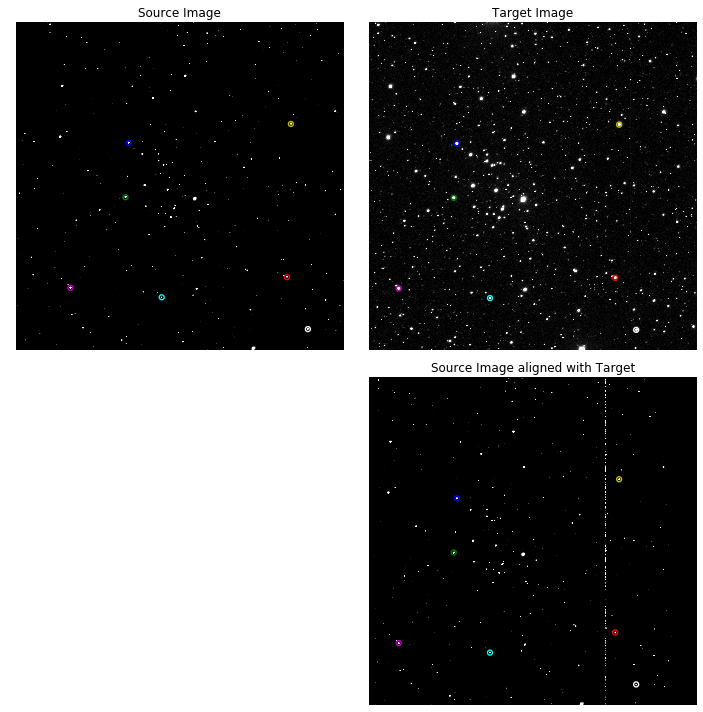

/home/m897k396/ASTR596/Data_Reduced_20191104/s052_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (14.79, 1.59)


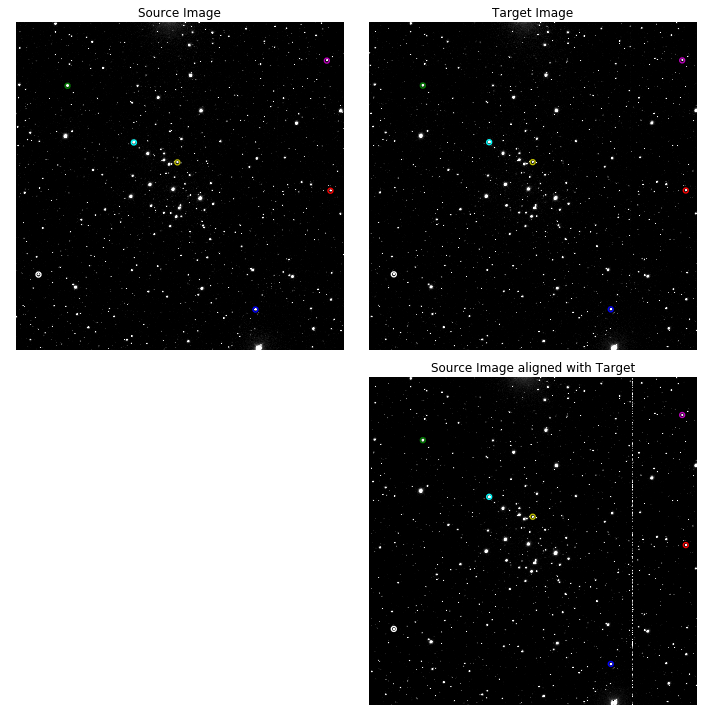

/home/m897k396/ASTR596/Data_Reduced_20191104/s053_trbf.fits
Rotation: -0.00 degrees

Scale factor: 1.00

Translation: (x, y) = (23.14, 2.97)


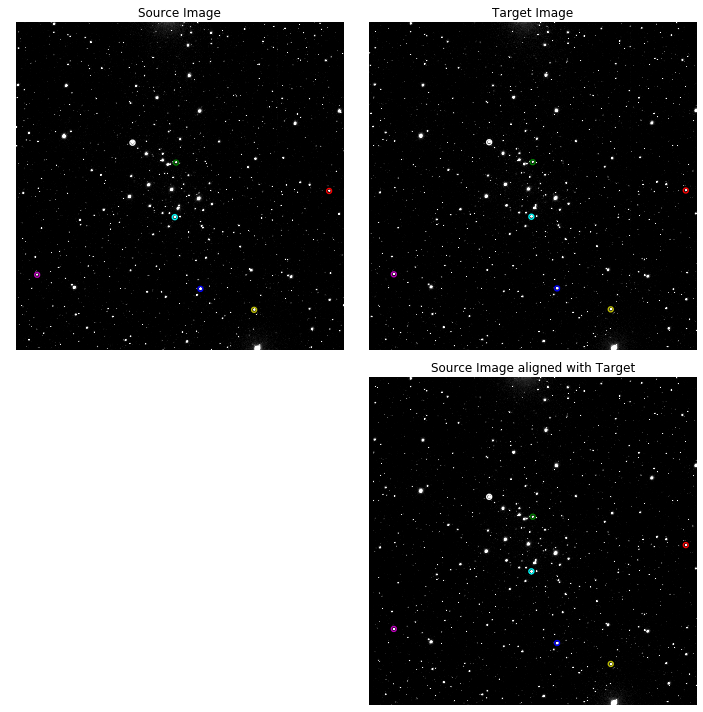

/home/m897k396/ASTR596/Data_Reduced_20191104/s054_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (54.01, 4.47)


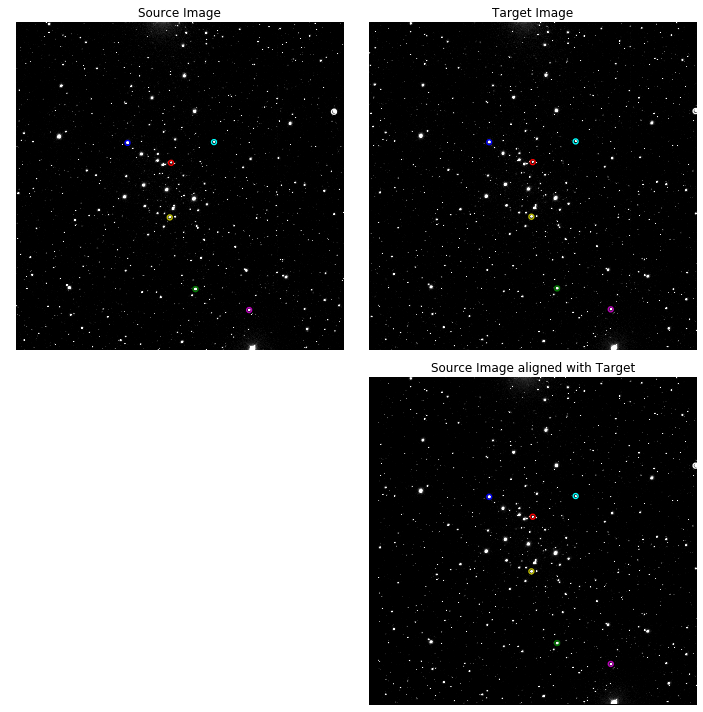

/home/m897k396/ASTR596/Data_Reduced_20191104/s055_trbf.fits
Rotation: -0.01 degrees

Scale factor: 1.00

Translation: (x, y) = (87.27, 5.92)


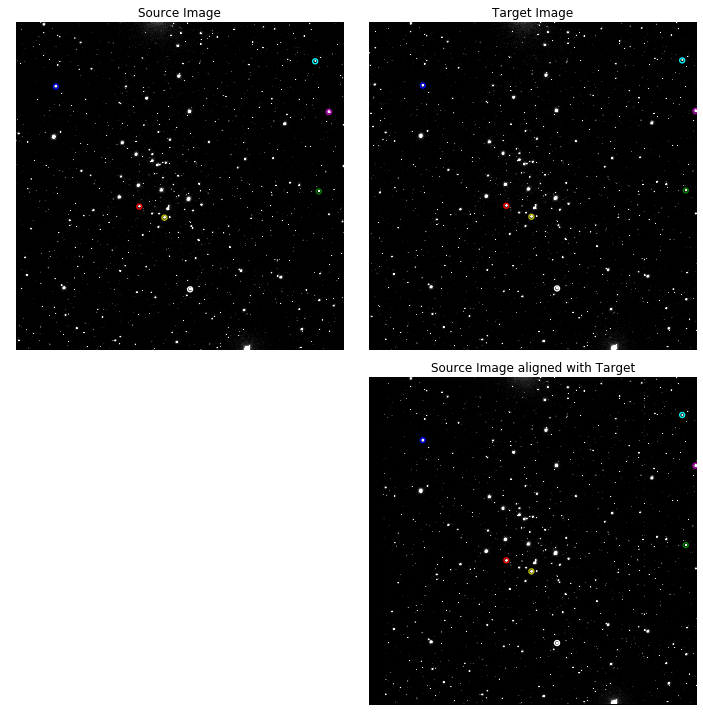

/home/m897k396/ASTR596/Data_Reduced_20191104/s056_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (115.08, 7.70)


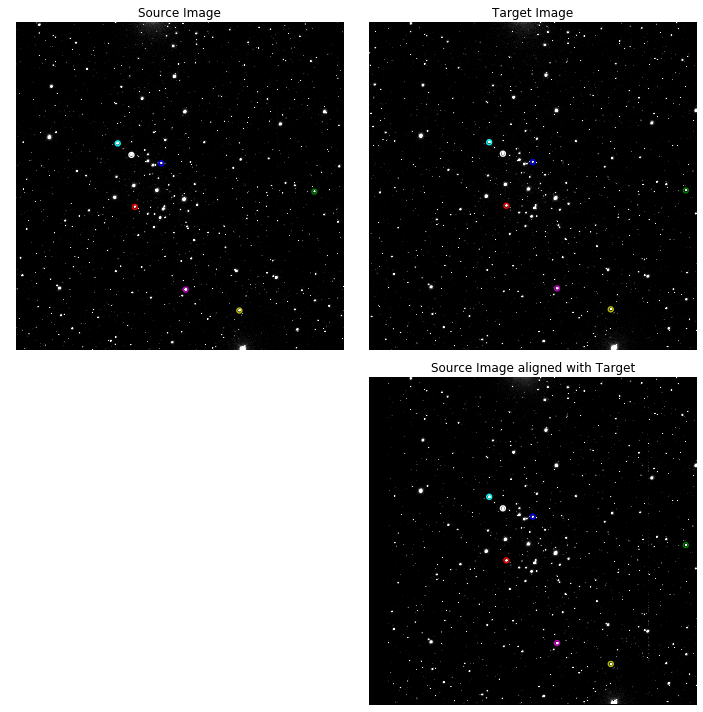

/home/m897k396/ASTR596/Data_Reduced_20191104/s057_trbf.fits
Rotation: -0.02 degrees

Scale factor: 1.00

Translation: (x, y) = (145.17, 8.75)


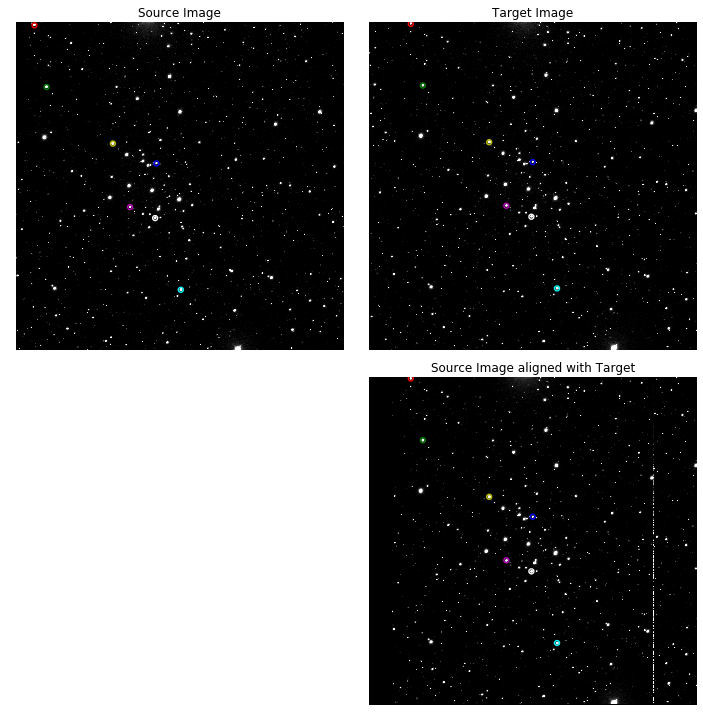

/home/m897k396/ASTR596/Data_Reduced_20191104/s058_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (176.33, 8.76)


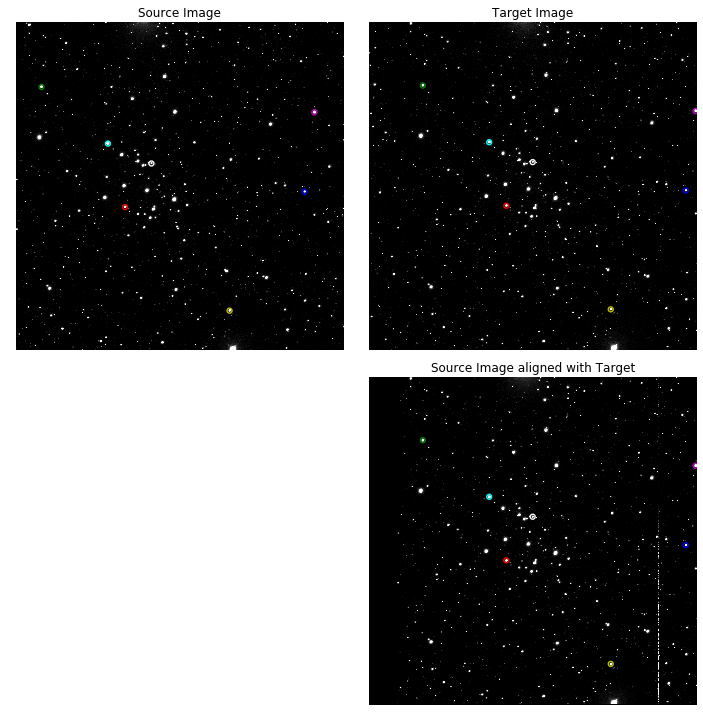

/home/m897k396/ASTR596/Data_Reduced_20191104/s059_trbf.fits
Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (204.53, 8.60)


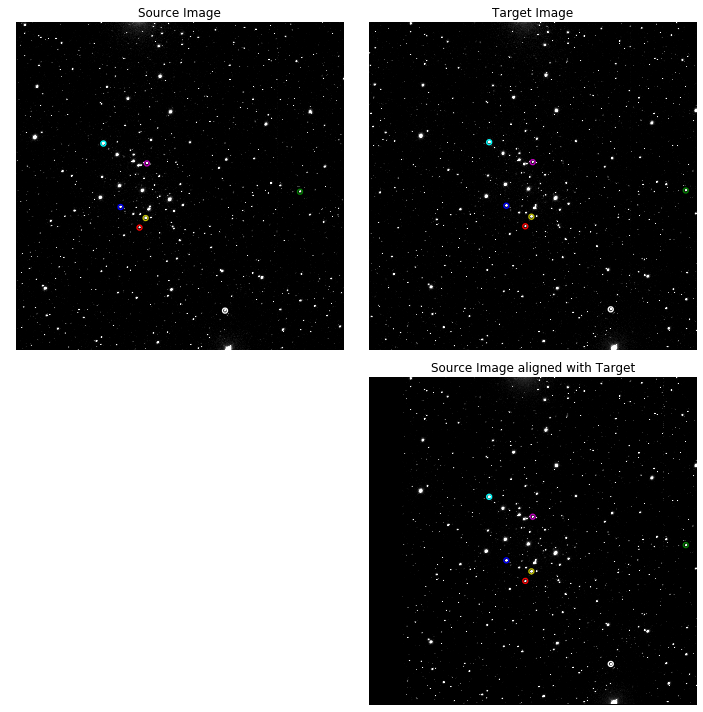

In [14]:
#***********
#NGC 7296 V-band
im_trans("s061_trbf.fits","s060_trbf.fits","s061_trfa.fits")
im_trans("s062_trbf.fits","s060_trbf.fits","s062_trfa.fits")
im_trans("s063_trbf.fits","s060_trbf.fits","s063_trfa.fits")
im_trans("s064_trbf.fits","s060_trbf.fits","s064_trfa.fits")
im_trans("s065_trbf.fits","s060_trbf.fits","s065_trfa.fits")
im_trans("s066_trbf.fits","s060_trbf.fits","s066_trfa.fits")
im_trans("s067_trbf.fits","s060_trbf.fits","s067_trfa.fits")
im_trans("s068_trbf.fits","s060_trbf.fits","s068_trfa.fits")
im_trans("s069_trbf.fits","s060_trbf.fits","s069_trfa.fits")
im_trans("s070_trbf.fits","s060_trbf.fits","s070_trfa.fits")

#NGC 7296 B-band
im_trans("s052_trbf.fits","s051_trbf.fits","s052_trfa.fits")
im_trans("s053_trbf.fits","s051_trbf.fits","s053_trfa.fits")
im_trans("s054_trbf.fits","s051_trbf.fits","s054_trfa.fits")
im_trans("s055_trbf.fits","s051_trbf.fits","s055_trfa.fits")
im_trans("s056_trbf.fits","s051_trbf.fits","s056_trfa.fits")
im_trans("s057_trbf.fits","s051_trbf.fits","s057_trfa.fits")
im_trans("s058_trbf.fits","s051_trbf.fits","s058_trfa.fits")
im_trans("s059_trbf.fits","s051_trbf.fits","s059_trfa.fits")

Now open the transformed images in ds9 in different and confirm that they are aligned by blinking the frames.